In [ ]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=5, linewidth=200, threshold=200, suppress=False)

In [425]:


def KSS(d =0, alpha = 1,x  = 0):

    kappa = 10**(3/4)/np.sqrt(alpha)   

    if kappa**2<100*x:
        kappa = np.sqrt(100*x)
    
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 

    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = gamma(x)*(kappa + omega_k * beta(x))

    Xi_sq = Xi**2

    return Xi_sq #-1e5


# #solve for KSS = 1e5 for x >5 using root finding

# from scipy.optimize import root_scalar

# sol = root_scalar(KSS ,args=(3, 0.01),bracket = [10,100])
# print(sol.root)




In [426]:
KSS(d = 4, alpha = 0.01, x = 10)

10207.901853457168

In [437]:




xs = np.linspace(0, 100, 10000)
y = np.array([KSS(d = 0, alpha = 0.01, x = i) for i in xs])




In [438]:
print(y)

[ 3162.27766  3162.27766  3162.27766 ...  9997.9998   9998.9999  10000.     ]


In [439]:


reference_t = 56 #1e5, roughly 50 s
reference_Xi_sq = 1e5

times = (y/reference_Xi_sq)**2*50

print(times)


[0.05   0.05   0.05   ... 0.4998 0.4999 0.5   ]


In [440]:
print(np.sum(times)/3600)

0.4922704779717785


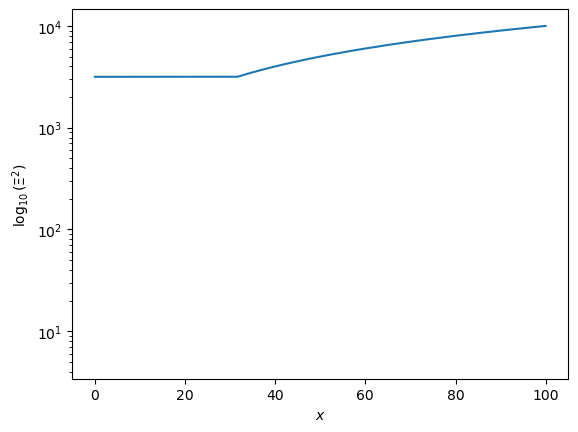

In [441]:


plt.semilogy(xs, y)
plt.xlabel('$x$')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(xs), colors='r', linestyles='dashed', label='1e6')

plt.show()



In [442]:
ds = np.array([[0,0,0], [1,0,0], [1,1,0], [1,1,1], [2,0,0], [2,1,0], [2,1,1], [2,2,0], [2,2,1], [2,2,2], [3,0,0], [3,1,0], [3,1,1], [3,2,0], [3,2,1], [3,2,2], [3,3,0], [3,3,1], [3,3,2], [3,3,3], [4,0,0], [4,1,0], [4,1,1], [4,2,0], [4,2,1], [4,2,2], [4,3,0], [4,3,1], [4,3,2], [4,3,3], [4,4,0], [4,4,1], [4,4,2], [4,4,3], [4,4,4]])

In [443]:
alpha = 0.1
x = 30


inputs = np.sum(ds**2, axis=1)
inputs = np.unique(inputs)
outputs = np.array([KSS(d, alpha,x) for d in inputs])




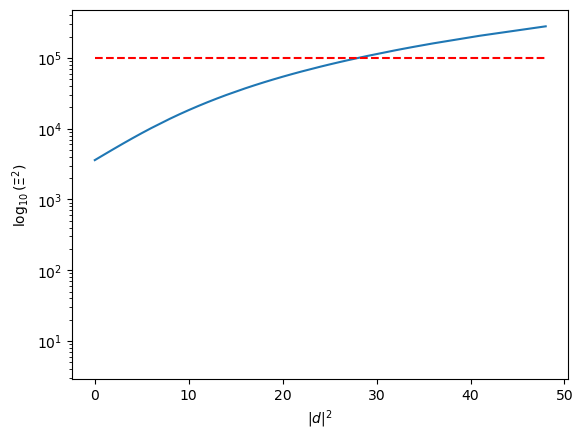

[3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5]
[  3600.        4314.79089   5163.93134   6162.73781   7325.37349   8664.48675  10191.03573  13841.87844  15980.09033  18333.95937  20907.52977  23704.03067  26726.03708  29975.60366  37163.66399
  41104.53691  45277.85061  49684.30292  54324.46392  59198.80171  64307.70262  75230.42245  81044.73242  87094.60546  93380.20092 106659.08067 128348.12179 136050.30266 143988.83315 160575.1301
 206179.73096 279963.9437 ]
[ 0  1  2  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 27 29 32 33 34 36 41 48]


In [208]:


plt.semilogy(inputs, outputs)
plt.xlabel('$| d |^2 $')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(inputs), colors='r', linestyles='dashed', label='1e6')

plt.show()

print(np.array(np.log10(outputs), dtype = int))
print(outputs)
print(inputs)

In [185]:
print(inputs[np.where(outputs >= 10**5)])

[ 4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 24 25 26 27 29 32 33 34 36 41 48]


In [81]:
def RK(d =0, alpha = 1,x  = 0):

    kappa = 10**(3/4)/np.sqrt(alpha)      
    
    ML = 4
    m_tilde_sq = ((ML)/(np.pi))**(2)

    def beta(x):
            return d/np.sqrt(m_tilde_sq + d**2+ 4*x) 

    def gamma(x):
            return 1/np.sqrt(1-beta(x)**2)

    omega_k = np.sqrt(kappa**2 + m_tilde_sq/4)

    Xi = kappa*gamma(x) + d/2

    Xi_sq = Xi**2

    return Xi_sq

In [82]:
alpha = 0.1
x = 0


inputs = np.sum(ds**2, axis=1)
inputs = np.unique(inputs)
outputs = np.array([RK(d, alpha,x) for d in inputs])

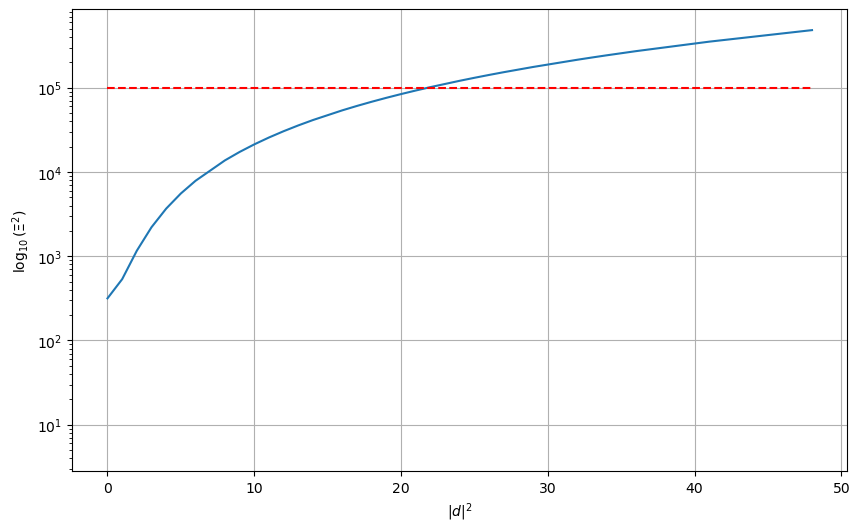

[3.16227766e+02 5.34154738e+02 1.16371504e+03 2.21061599e+03
 3.67578368e+03 5.55941479e+03 7.86156728e+03 1.37215104e+04
 1.72793150e+04 2.12556790e+04 2.56506037e+04 3.04640902e+04
 3.56961388e+04 4.13467500e+04 5.39036609e+04 6.08099610e+04
 6.81348242e+04 7.58782507e+04 8.40402405e+04 9.26207937e+04
 1.01619910e+05 1.20873833e+05 1.31128640e+05 1.41802010e+05
 1.52893944e+05 1.76333502e+05 2.14632065e+05 2.28235379e+05
 2.42257257e+05 2.71556704e+05 3.52130182e+05 4.82512718e+05]


In [83]:

plt.figure(figsize=(10,6))
plt.semilogy(inputs, outputs)
plt.xlabel('$| d |^2 $')
plt.ylabel('$\log_{10}(\Xi^2)$')
plt.hlines(10**5, 0, max(inputs), colors='r', linestyles='dashed', label='1e6')
plt.grid()
plt.show()

print(outputs)

# Kappa in RG formalism

# Runtime plot

In [1]:
from zeta import zeta
from time import time

In [78]:
zeta(0.01, 2e5, 0.1, d = np.array([1,0,0]))

: 

In [4]:
print(time())

1710191496.888565


In [35]:


ks = np.linspace(0,5,30)
cutoff_sq = 10**(ks)

cutoff_sq = np.linspace(0,10e4, 40)

runtime = np.array([])


for i in range(len(cutoff_sq)):
    start = time()
    zeta(0.01, cutoff_sq[i], 0.1, d = np.array([1,0,0]))
    runtime = np.append(runtime, time()-start)



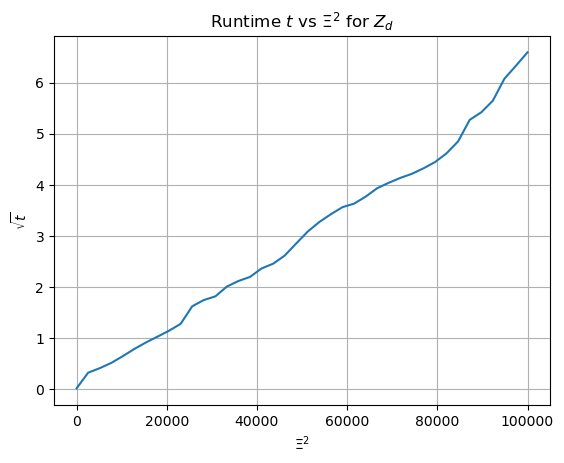

In [45]:
plt.plot(cutoff_sq, np.sqrt(runtime)) 

plt.title('Runtime $t$ vs $\Xi^2$ for $Z_d$')
plt.xlabel('$\Xi^2$')
plt.ylabel('$\sqrt{t}$')
plt.grid()
plt.show()




In [34]:
25/16

1.5625

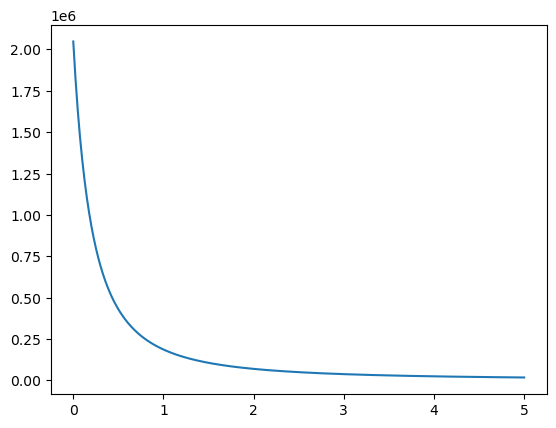

In [53]:
x = np.linspace(0, 5, 400)

y = np.array([worst_case(8, 0.1, i) for i in x])

plt.plot(x, y)



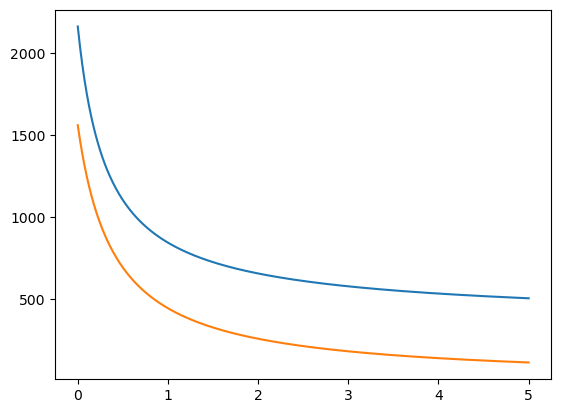

In [77]:
x = np.linspace(0, 5, 400)



tfunc = lambda x: 12.5/(x+0.4)

tf = np.vectorize(tfunc)

y1 = tf(x)
y = np.array([worst_case(1, 0.1, i) for i in x])

plt.plot(x, y)


In [63]:
print((4/np.pi)**2)

1.6211389382774046


In [65]:
12.5*np.log(1+0.4) - 12.5*np.log(0.4)

15.659537106192099

In [71]:
np.sum(tf(np.linspace(0, 1, 400)))

6268.259575868627

Process SpawnPoolWorker-1:
Process SpawnPoolWorker-3:
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'worker' on <module '__main__' (built-in)>
Traceback (most recent call last):
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/ericrechberger/opt/anaconda3/lib/python3.9/multiprocessing/process.py", line 108, in run
  

KeyboardInterrupt: 

# Convergence Idea

By exploiting the analogies of the sum and the integrals I found a nice way to relate the wanted error (which I set to 10^{-6}) to the integral. the condition is:


$\Xi^2 = \left( \frac{1}{\epsilon}   \right)^{1/(a-b-\frac{1}{2})} $

This should serve as a very rough approximation

In [66]:
epsilon = 1e-5

expected_Xi_sq = lambda a,b:  (1/epsilon)**(1/(a-b+1/2)) if a-b > 1/2 else np.nan

In [69]:

a = 2
b = 1
expected_Xi_sq(a,b)


2154.4346900318824

In [342]:
print(10**(-2/3))

0.2154434690031884


In [454]:
import numpy as np
from scipy.special import erfc

# Assign numerical values to k and alpha
k = 1.0  # Example value
alpha = 1.0  # Example value

# Calculate the expression
@np.vectorize
def error2(k, alpha):
    return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))




In [455]:
m = np.linspace(0, 5, 100)
a = np.linspace(0, 10, 100)

M, A = np.meshgrid(m, a)

K = 10**M
ALPHA = 10**(-A)

Z = error2(K, ALPHA)








/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/2768630323.py:11: RuntimeWarning: overflow encountered in exp
  return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/2768630323.py:11: RuntimeWarning: invalid value encountered in scalar multiply
  return (5 * np.exp((k**2 * alpha) / 10) * (2 * np.exp(-k**2 * alpha) * k * np.sqrt(alpha) + np.sqrt(np.pi) * (1 + (k**2 * alpha) / 5) * erfc(k * np.sqrt(alpha)))) / (2 * k**2 * alpha**(3/2))


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/3497276177.py:5: RuntimeWarning: invalid value encountered in log10
  contour = plt.contourf(M/2, A, np.log10(Z-1e-5), levels=100, cmap='viridis')


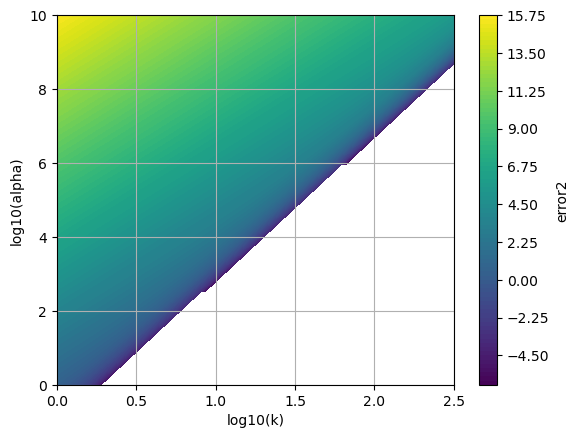

In [456]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


contour = plt.contourf(M/2, A, np.log10(Z-1e-5), levels=100, cmap='viridis')

plt.xlabel('log10(k)')
plt.ylabel('log10(alpha)')

plt.colorbar(contour, label='error2')
plt.grid()
plt.show()


In [445]:
import numpy as np
from scipy.special import erfc

# Define variables (example values)
k = 1.0  # Example value for k
alpha = 1.0  # Example value for alpha

# Calculate the expression
result = erfc(k**2 * alpha) * np.sqrt(np.pi) / np.sqrt(alpha)

def error(k, alpha):
    return erfc(k**2 * alpha) * np.sqrt(np.pi) / np.sqrt(alpha)

In [446]:
m = np.linspace(0, 5, 100)
a = np.linspace(0, 10, 100)

M, A = np.meshgrid(m, a)

K = 10**M
ALPHA = 10**(-A)

Z = error(K, ALPHA)


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/1585280186.py:3: RuntimeWarning: invalid value encountered in log
  contour = plt.contourf(M/2, A, np.log(Z-1e-5), levels=100, cmap='viridis')


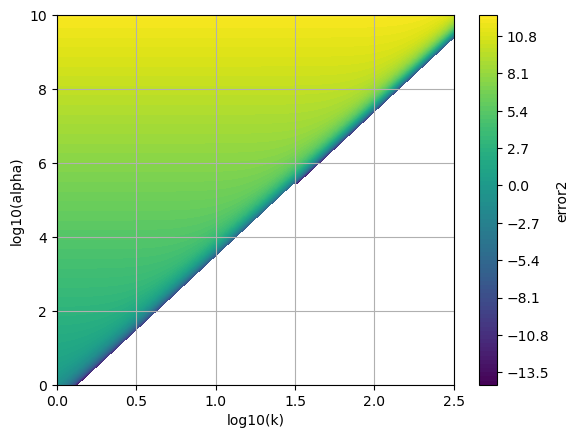

In [449]:

import matplotlib.pyplot as plt

contour = plt.contourf(M/2, A, np.log(Z-1e-5), levels=100, cmap='viridis')

plt.xlabel('log10(k)')
plt.ylabel('log10(alpha)')

plt.colorbar(contour, label='error2')
plt.grid()
plt.show()




# Final Error Approx

here I used mathematica for integration and will solve for the error graphically



In [ ]:
def error2(k, alpha):

    x = k**2/100
    return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
    


m = np.linspace(0, 10, 700)
a = np.linspace(0, 10, 700)

M, A = np.meshgrid(m, a)

K = 10**(M/2)

ALPHA = 10**(-A)





In [ ]:
Z = error2(K, ALPHA)

import matplotlib.pyplot as plt

#open plots in other window
%matplotlib qt



log_error = np.log10(Z-1e-6)

plt.figure(figsize=(20,10))

contour = plt.contourf(M, A, log_error, levels=100, cmap='viridis')


plt.xlabel('$\log_{10}(\\kappa^2)$')
plt.ylabel('$\log_{10}(\\alpha)$')
plt.colorbar(contour, label='error2')

plt.plot(m, (m)*0.965-1, 'r--', label='$\kappa^2 = \\alpha$')

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.grid()
plt.show()


/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/1192684424.py:4: RuntimeWarning: overflow encountered in exp
  return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/1192684424.py:4: RuntimeWarning: invalid value encountered in multiply
  return 0.5 * np.exp(x * alpha) * ((2 * np.exp(-k**2 * alpha) * x) / k + (np.sqrt(np.pi) * (1 - 2 * x * alpha) * erfc(k * np.sqrt(alpha))) / np.sqrt(alpha))
/var/folders/jw/v39ld52d21dg5yc3z5wt296r0000gn/T/ipykernel_44250/3854579987.py:10: RuntimeWarning: invalid value encountered in log10
  log_error = np.log10(Z-1e-5)


In [ ]:
log_error

array([[-0.84865, -0.86762, -0.8871 , ...,      nan,      nan,      nan],
       [-0.82303, -0.8415 , -0.86046, ...,      nan,      nan,      nan],
       [-0.79791, -0.81588, -0.83434, ...,      nan,      nan,      nan],
       ...,
       [ 4.93323,  4.93323,  4.93323, ...,  4.13707,  4.11811,  4.09862],
       [ 4.94039,  4.94039,  4.94039, ...,  4.16269,  4.14423,  4.12526],
       [ 4.94754,  4.94754,  4.94754, ...,  4.18781,  4.16984,  4.15138]])

In [506]:
(1.03)*0.965

0.99395